<a href="https://colab.research.google.com/github/armandoordonez/eda_couse/blob/main/Knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import pandas as pd
import numpy as np

# Graficos
import matplotlib.pyplot as plt
import seaborn as sb

# Kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
# Configuración gráficos

%matplotlib inline 
# guarda gráficos con el notebook sin recargar

from mpl_toolkits.mplot3d import Axes3D # Gráficos en 3D

plt.rcParams['figure.figsize'] = (16, 9) # styles of Matplotlib
plt.style.use('ggplot')


import warnings
warnings.filterwarnings("ignore")


# NOTA Los resultados obtenidos pueden varias de ejecución en ejecución pues al inicializar aleatoriamente los centroids, podemos obtener grupos distintos o los mismos pero en distinto orden y color

# Dataset
Rasgos de la personalidad de usuarios de Twitter
usuario (el nombre en Twitter)
“op” = Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte
“co” =Conscientiousness – grado de orden, prolijidad, organización
“ex” = Extraversion – grado de timidez, solitario o participación ante el grupo social
“ag” = Agreeableness – grado de empatía con los demás, temperamento
“ne” = Neuroticism, – grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo.
Wordcount – Cantidad promedio de palabras usadas en sus tweets
Categoria – Actividad laboral del usuario (actor, cantante, etc.)

El archivo contiene diferenciadas 9 categorías -actividades laborales- que son:

Actor/actriz
Cantante
Modelo
Tv, series
Radio
Tecnología
Deportes
Politica
Escritor


Tomado de https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/

In [94]:

dataframe = pd.read_csv("https://raw.githubusercontent.com/armandoordonez/eda_couse/main/data/analisis.csv")
dataframe.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [95]:
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [96]:
	
print(dataframe.groupby('categoria').size())

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


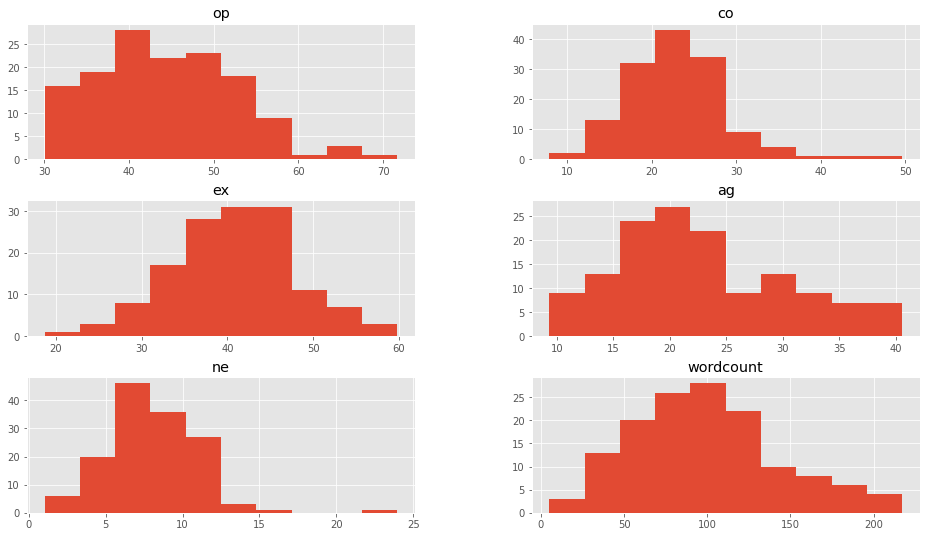

In [97]:
dataframe.drop(['categoria'],1).hist()
plt.show()

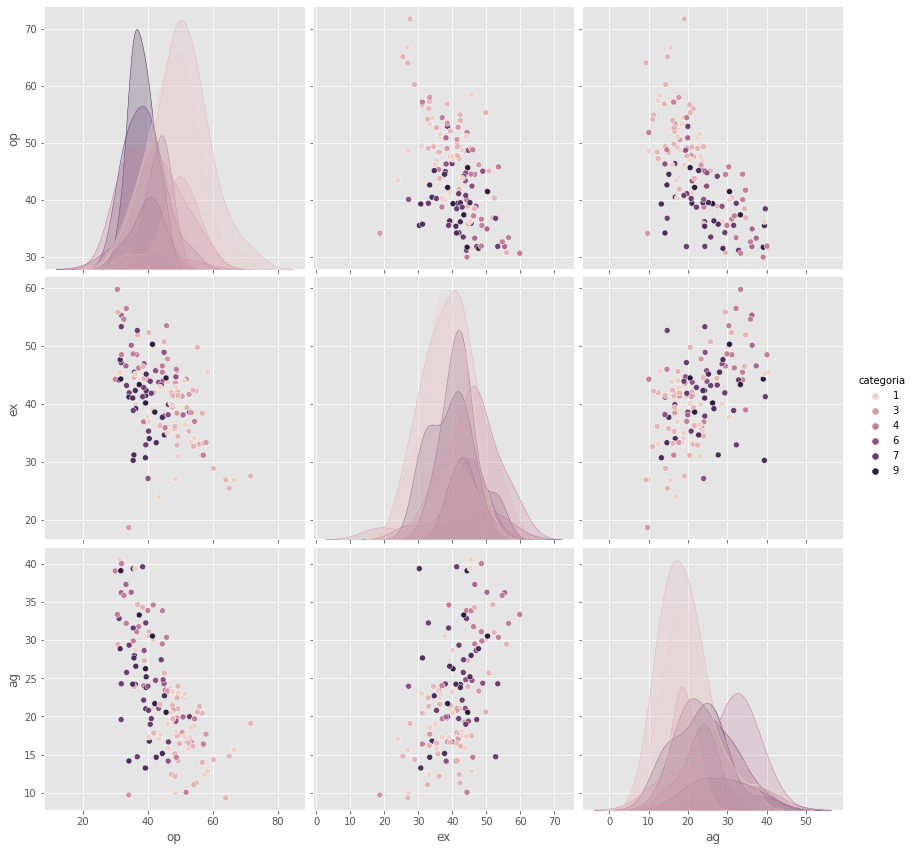

In [98]:
sb.pairplot(dataframe.dropna(), hue='categoria',size=4,vars=["op","ex","ag"],kind='scatter')

In [99]:
X = np.array(dataframe[["op","ex","ag"]])
# Openess, Extraversion y Agreeablenes
y = np.array(dataframe['categoria'])
X.shape

(140, 3)

In [100]:
y.shape

(140,)

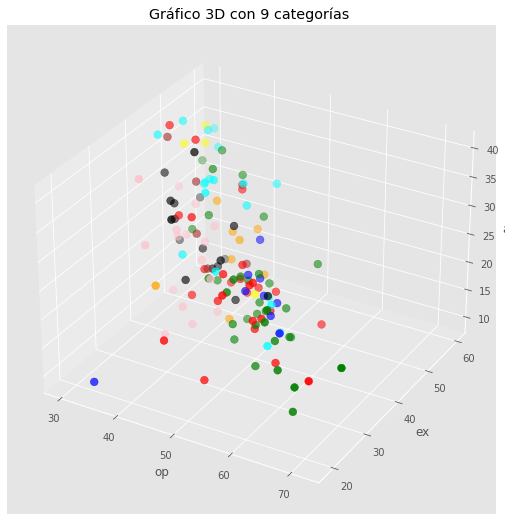

In [101]:
# Coloreamos con 9 colores al azar

asignar=[]
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']

for row in y:
    asignar.append(colores[row])


# Figura
fig = plt.figure()
# Ejes
ax = fig.add_subplot(projection='3d')

# Grafico de dispersión 
scatt = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

ax.set_title("Gráfico 3D con 9 categorías ")
ax.set_xlabel('op')
ax.set_ylabel('ex')
ax.set_zlabel('ag')

plt.show()




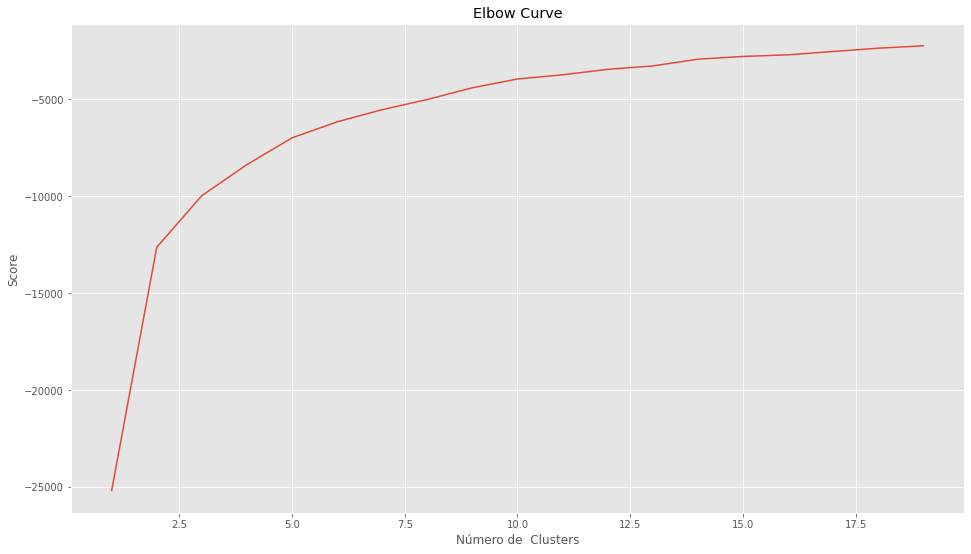

In [102]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Número de  Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

import warnings
warnings.filterwarnings("ignore")

In [103]:
# Seleccionamos K o n_clusters = 5
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[50.29293117 40.88830576 17.44525734]
 [39.64330308 43.84060941 27.03771349]
 [33.98134736 49.445743   34.45634373]
 [58.70462307 30.53566167 15.72207033]
 [42.4428538  34.50622228 19.9628938 ]]


In [104]:
# Predicting the clusters
labels = kmeans.predict(X)
labels.shape

(140,)

In [105]:
labels


array([1, 4, 1, 2, 2, 1, 1, 2, 0, 1, 0, 4, 3, 0, 1, 0, 1, 1, 0, 2, 2, 0,
       4, 2, 0, 4, 1, 1, 1, 0, 4, 0, 0, 0, 2, 2, 1, 2, 1, 4, 1, 1, 1, 1,
       0, 3, 0, 0, 2, 2, 0, 1, 1, 3, 1, 0, 4, 0, 4, 3, 4, 4, 0, 3, 1, 1,
       3, 3, 0, 1, 1, 4, 4, 0, 4, 3, 1, 2, 2, 2, 2, 4, 3, 0, 4, 1, 0, 1,
       0, 0, 0, 4, 4, 0, 0, 1, 2, 0, 2, 0, 3, 0, 0, 2, 3, 0, 1, 1, 4, 0,
       0, 1, 2, 1, 1, 0, 4, 3, 1, 1, 4, 2, 0, 4, 3, 4, 4, 0, 0, 4, 0, 0,
       4, 1, 3, 1, 2, 3, 0, 2], dtype=int32)

In [106]:
# Getting the cluster centers
C = kmeans.cluster_centers_
C.shape

(5, 3)

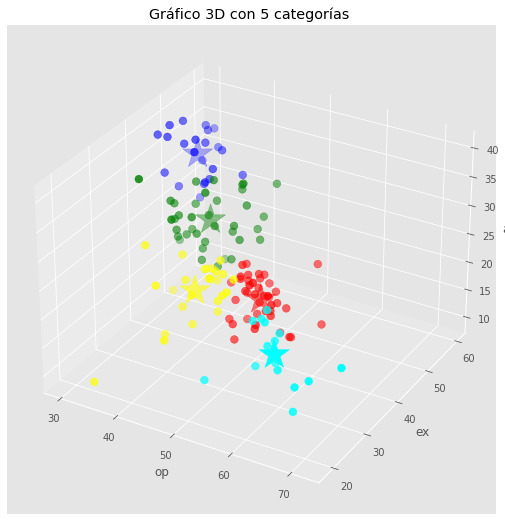

In [107]:

asignar=[]

colores=['red','green','blue','cyan','yellow']

for row in labels:
    asignar.append(colores[row])

# Figura
fig = plt.figure()
# Ejes
ax = fig.add_subplot(projection='3d')

scat1 = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
scat2 = ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

ax.set_title("Gráfico 3D con 5 categorías ")
ax.set_xlabel('op')
ax.set_ylabel('ex')
ax.set_zlabel('ag')

plt.show()

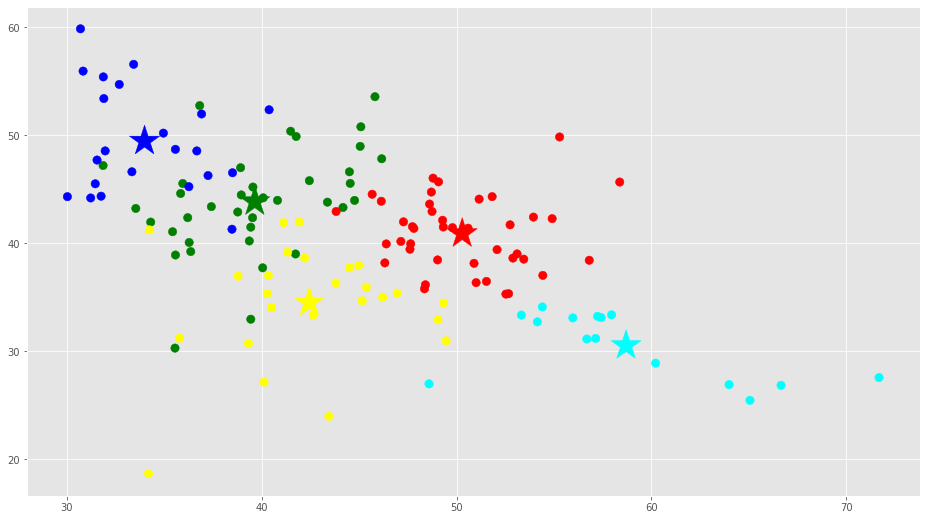

In [108]:
# Getting the values and plotting it
f1 = dataframe['op'].values
f2 = dataframe['ex'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()


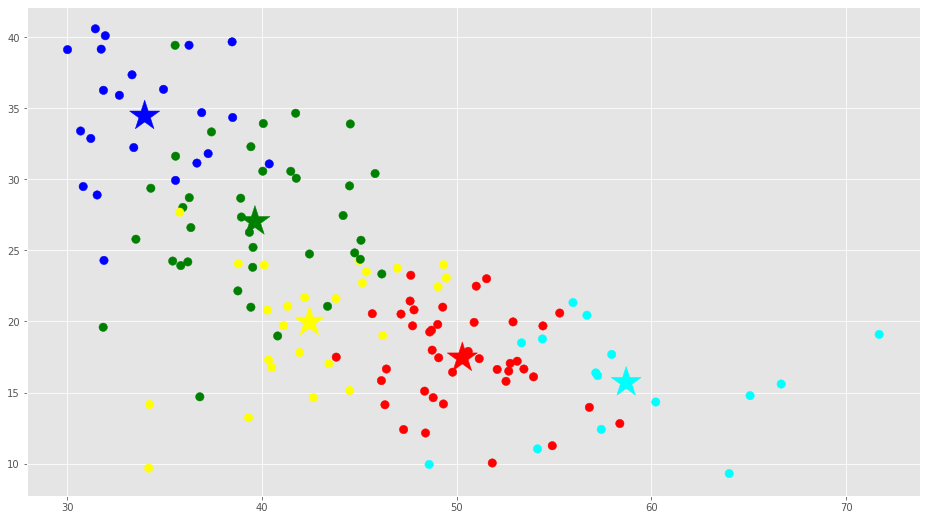

In [109]:
# Getting the values and plotting it
f1 = dataframe['op'].values
f2 = dataframe['ag'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

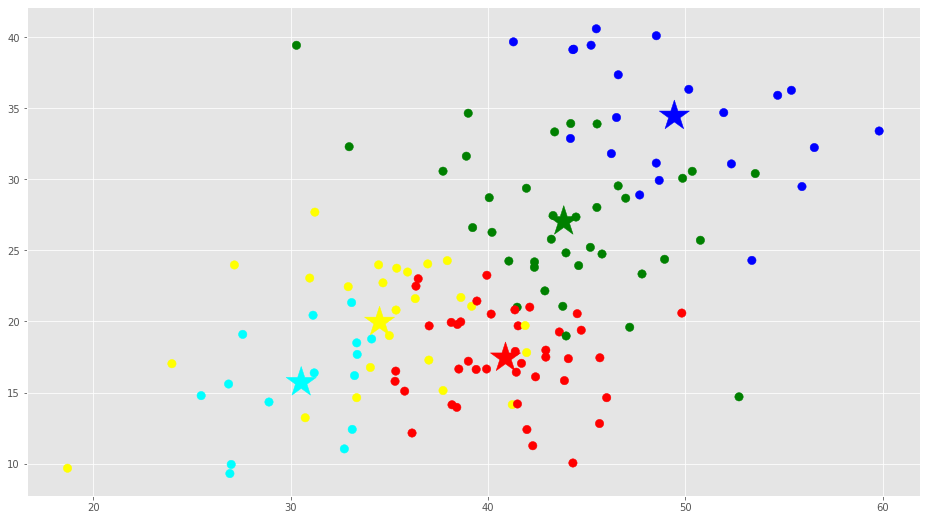

In [110]:
f1 = dataframe['ex'].values
f2 = dataframe['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [111]:
copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,41
1,green,37
2,blue,22
3,cyan,15
4,yellow,25


In [112]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,11.0
2,2,15.0
3,3,6.0
4,4,3.0
5,5,1.0
6,6,2.0
7,7,2.0
8,8,NaN
9,9,1.0


In [113]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([21, 38, 35, 82, 91])

In [114]:
users=dataframe['usuario'].values
for row in closest:
    print(users[row])

carmenelectra
David_Busta
DaniMateoAgain
JudgeJudy
kobebryant


In [117]:
#miramos los usuarios del grupo 0
for index, row in copy.iterrows():
    if row["label"] == 0:
        print (row["usuario"], row["categoria"],row["label"])

andyroddick 7 0
AngelAlessandra 3 0
AvrilLavigne 2 0
BarRefaeli 3 0
britneyspears 2 0
carmenelectra 3 0
celinedion 2 0
CindyCrawford 3 0
CourteneyCox 1 0
Courtney 2 0
Cristiano 7 0
EmWatson 1 0
epunset 6 0
EvaLongoria 3 0
Fergie 2 0
gwenstefani 2 0
heidiklum 3 0
IamStevenT 2 0
JessieJ 2 0
jimmyfallon 4 0
justdemi 1 0
kanyewest 2 0
katyperry 2 0
KevinSpacey 1 0
KidRock 2 0
LennyKravitz 2 0
LeoDiCaprio 1 0
MariahCarey 2 0
martinvars 6 0
MelanieGriffith 1 0
MileyCyrus 1 0
Oprah 4 0
PaulaMeliveo 5 0
paulocoelho 9 0
RealHughJackman 1 0
shakira 2 0
taylorswift13 2 0
TheEllenShow 4 0
TheReal_Jlh 1 0
TomCruise 1 0
ZacEfron 1 0


In [118]:
X_new = np.array([[45.92,57.74,15.66]]) #davidguetta
 
new_labels = kmeans.predict(X_new)
print(new_labels)

[0]
